In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [27]:
land_t21 = xr.open_dataset('./../data_isca/era_land_t21.nc')
land_t42 = xr.open_dataset('./../data_isca/era_land_t42.nc')

In [31]:
land_t21.land_mask

<xarray.DataArray 'land_mask' (lat: 32, lon: 64)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -85.76059 -80.268776 -74.74454 ... 80.268776 85.76059
  * lon      (lon) float32 0.0 5.625 11.25 16.875 ... 343.125 348.75 354.375

In [32]:
ctl_1x = xr.open_dataset('./../data_isca/Tierney_Ts_1xCO2.nc')
ctl_3x = xr.open_dataset('./../data_isca/Tierney_Ts_3xCO2.nc')
ctl_6x = xr.open_dataset('./../data_isca/Tierney_Ts_6xCO2.nc')
ctl_9x = xr.open_dataset('./../data_isca/Tierney_Ts_9xCO2.nc')

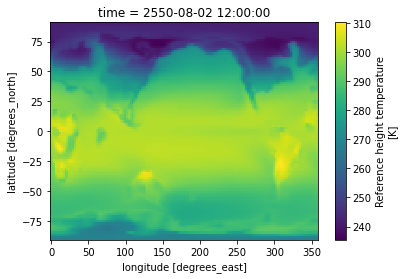

In [35]:
ctl_1x.TREFHT.isel(time=0).plot()

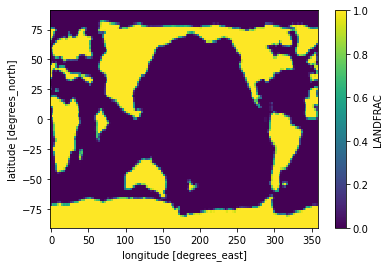

In [5]:
ctl_1x.LANDFRAC.mean('time').plot()

In [6]:
weights = np.cos(np.deg2rad(ctl_6x.lat))
weights.name = "weights"

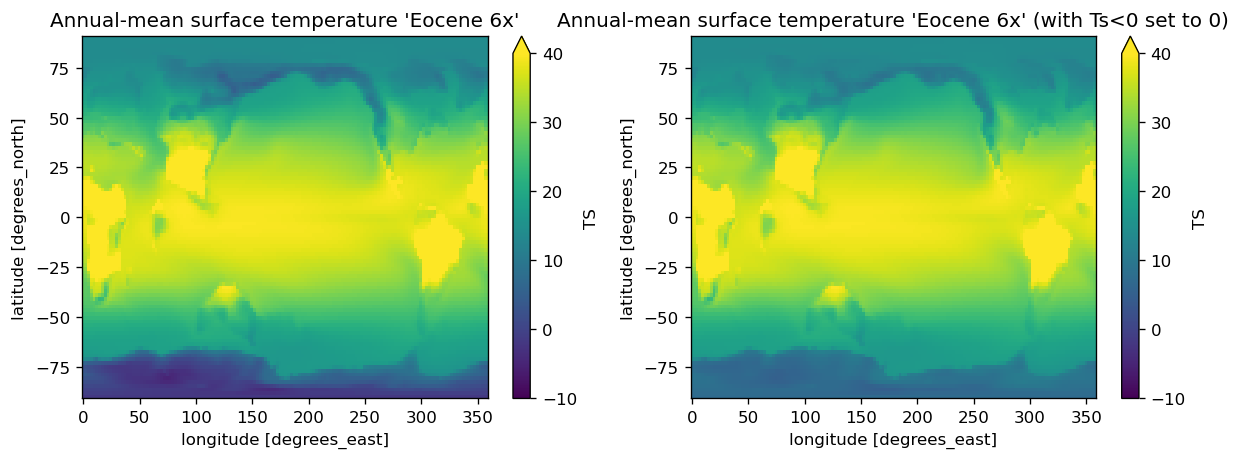

In [7]:
plt.figure(figsize=(12, 4),dpi=120)
plt.subplot(121)
(ctl_6x.TS.mean('time')-273).plot(vmin=-10,vmax=40)
plt.title('Annual-mean surface temperature \'Eocene 6x\'')
plt.subplot(122)
(ctl_6x.TS.where(ctl_6x.TS>273,273).mean('time')-273).plot(vmin=-10,vmax=40)
plt.title('Annual-mean surface temperature \'Eocene 6x\' (with Ts<0 set to 0)')
plt.show()

In [8]:
print(ctl_6x.TS.mean(('lon','time')).weighted(weights).mean('lat')-273)
print(ctl_6x.TS.where(ctl_6x.TS>273,273).mean(('lon','time')).weighted(weights).mean('lat')-273)

<xarray.DataArray ()>
array(30.64707404)
<xarray.DataArray ()>
array(30.82695307)


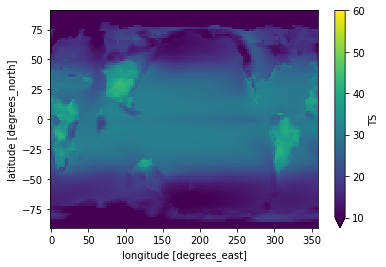

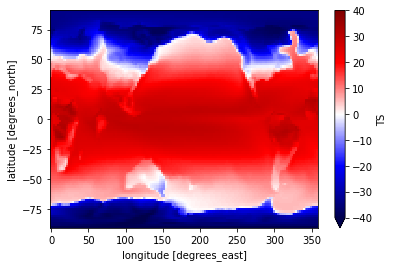

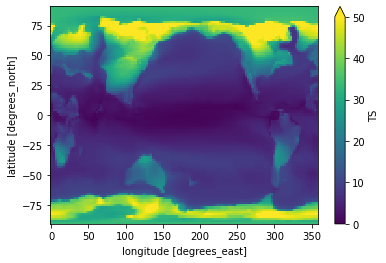

In [9]:
(ctl_1x.TS.max('time')-273).plot(vmin=10,vmax=60)
plt.show()
(ctl_1x.TS.min('time')-273).plot(vmin=-40,vmax=40,cmap='seismic')
plt.show()
(ctl_1x.TS.max('time')-ctl_1x.TS.min('time')).plot(vmin=0,vmax=50)

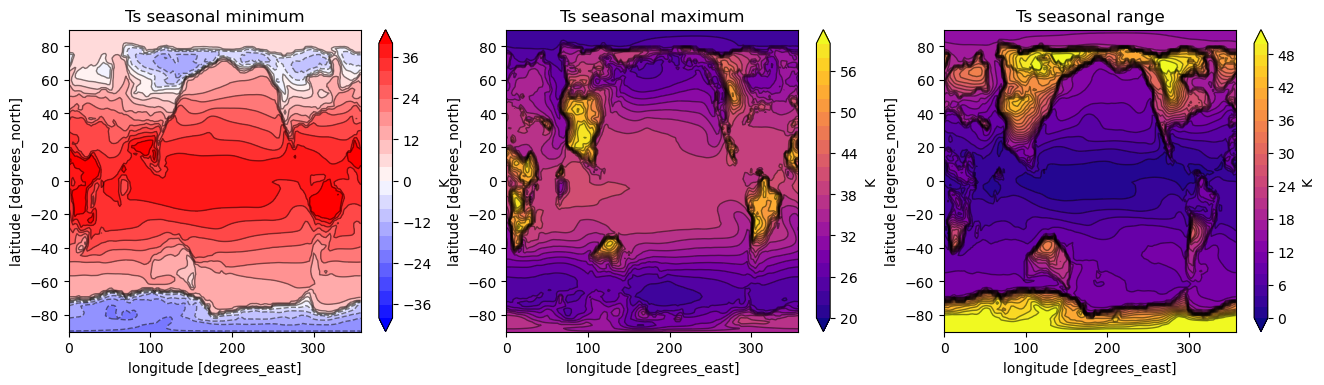

In [10]:
plt.figure(figsize=(16, 4),dpi=100)
plt.subplot(131)
(ctl_6x.TS.min('time')-273).plot.contourf(levels=np.linspace(-40,40,21),extend='both',cmap='bwr',cbar_kwargs={"label": "K"})
(ctl_6x.TS.min('time')-273).plot.contour(levels=np.linspace(-40,40,21),colors='k',linewidths=1,alpha=0.5)
plt.title('Ts seasonal minimum')
plt.subplot(132)
(ctl_6x.TS.max('time')-273).plot.contourf(levels=np.linspace(20,60,21),extend='both',cmap='plasma',cbar_kwargs={"label": "K"})
(ctl_6x.TS.max('time')-273).plot.contour(levels=np.linspace(20,60,21),colors='k',linewidths=1,alpha=0.5)
plt.title('Ts seasonal maximum')
plt.subplot(133)
(ctl_6x.TS.max('time')-ctl_6x.TS.min('time')).plot.contourf(levels=np.linspace(0,50,26),extend='both',cmap='plasma',cbar_kwargs={"label": "K"})
(ctl_6x.TS.max('time')-ctl_6x.TS.min('time')).plot.contour(levels=np.linspace(0,50,26),colors='k',linewidths=1,alpha=0.5)
plt.title('Ts seasonal range')
plt.show()

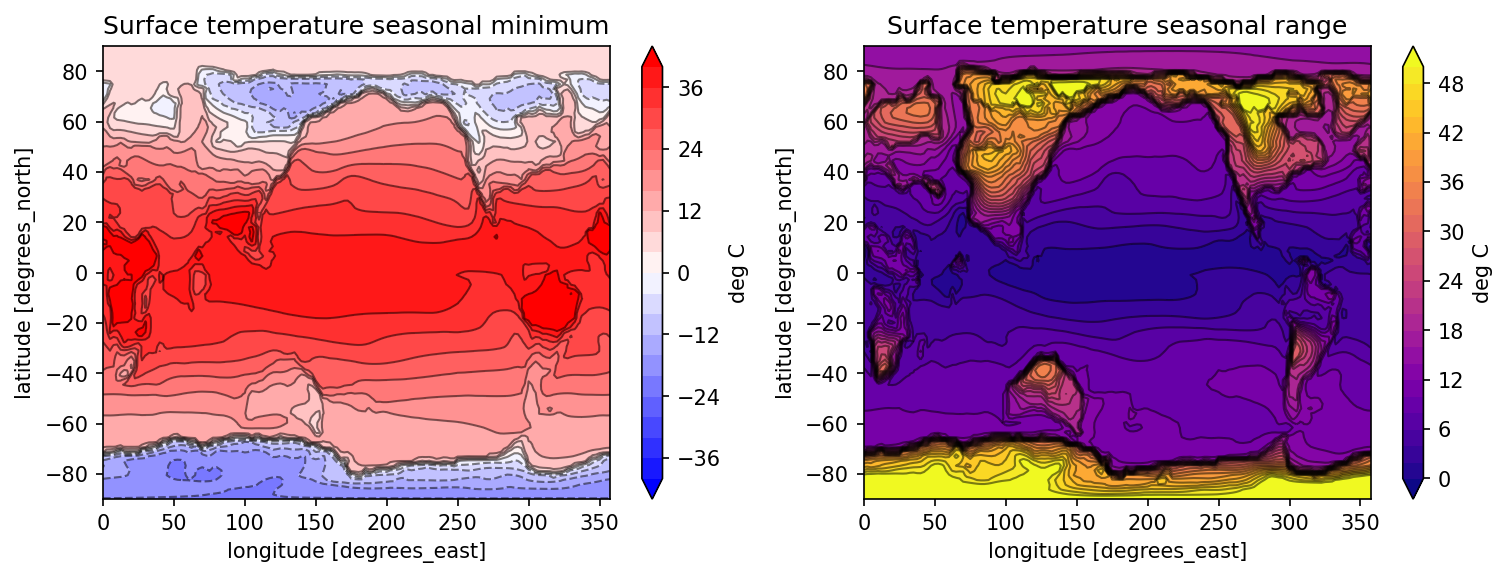

In [24]:
plt.figure(figsize=(12, 4),dpi=150)
plt.subplot(121)
(ctl_6x.TS.min('time')-273).plot.contourf(levels=np.linspace(-40,40,21),extend='both',cmap='bwr',cbar_kwargs={"label": "deg C"})
(ctl_6x.TS.min('time')-273).plot.contour(levels=np.linspace(-40,40,21),colors='k',linewidths=1,alpha=0.5)
plt.title('Surface temperature seasonal minimum')
plt.subplot(122)
(ctl_6x.TS.max('time')-ctl_6x.TS.min('time')).plot.contourf(levels=np.linspace(0,50,26),extend='both',cmap='plasma',cbar_kwargs={"label": "deg C"})
(ctl_6x.TS.max('time')-ctl_6x.TS.min('time')).plot.contour(levels=np.linspace(0,50,26),colors='k',linewidths=1,alpha=0.5)
plt.title('Surface temperature seasonal range')
plt.show()

In [12]:
(ctl_1x.TS-273).where(ctl_1x.lat>70).where(ctl_1x.LANDFRAC>0.9).mean('lon')

<xarray.DataArray 'TS' (time: 12, lat: 96)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * time     (time) object 2550-08-02 12:00:00 ... 2551-07-02 12:00:00

Proxies say seasonal range is 0-5 to 20-25, so equally a too hot and too cold problem.
Simple fix = increase heat capacity of high latitude land, i.e. = to vegetated land.
Or increase cloudiness but locally only?


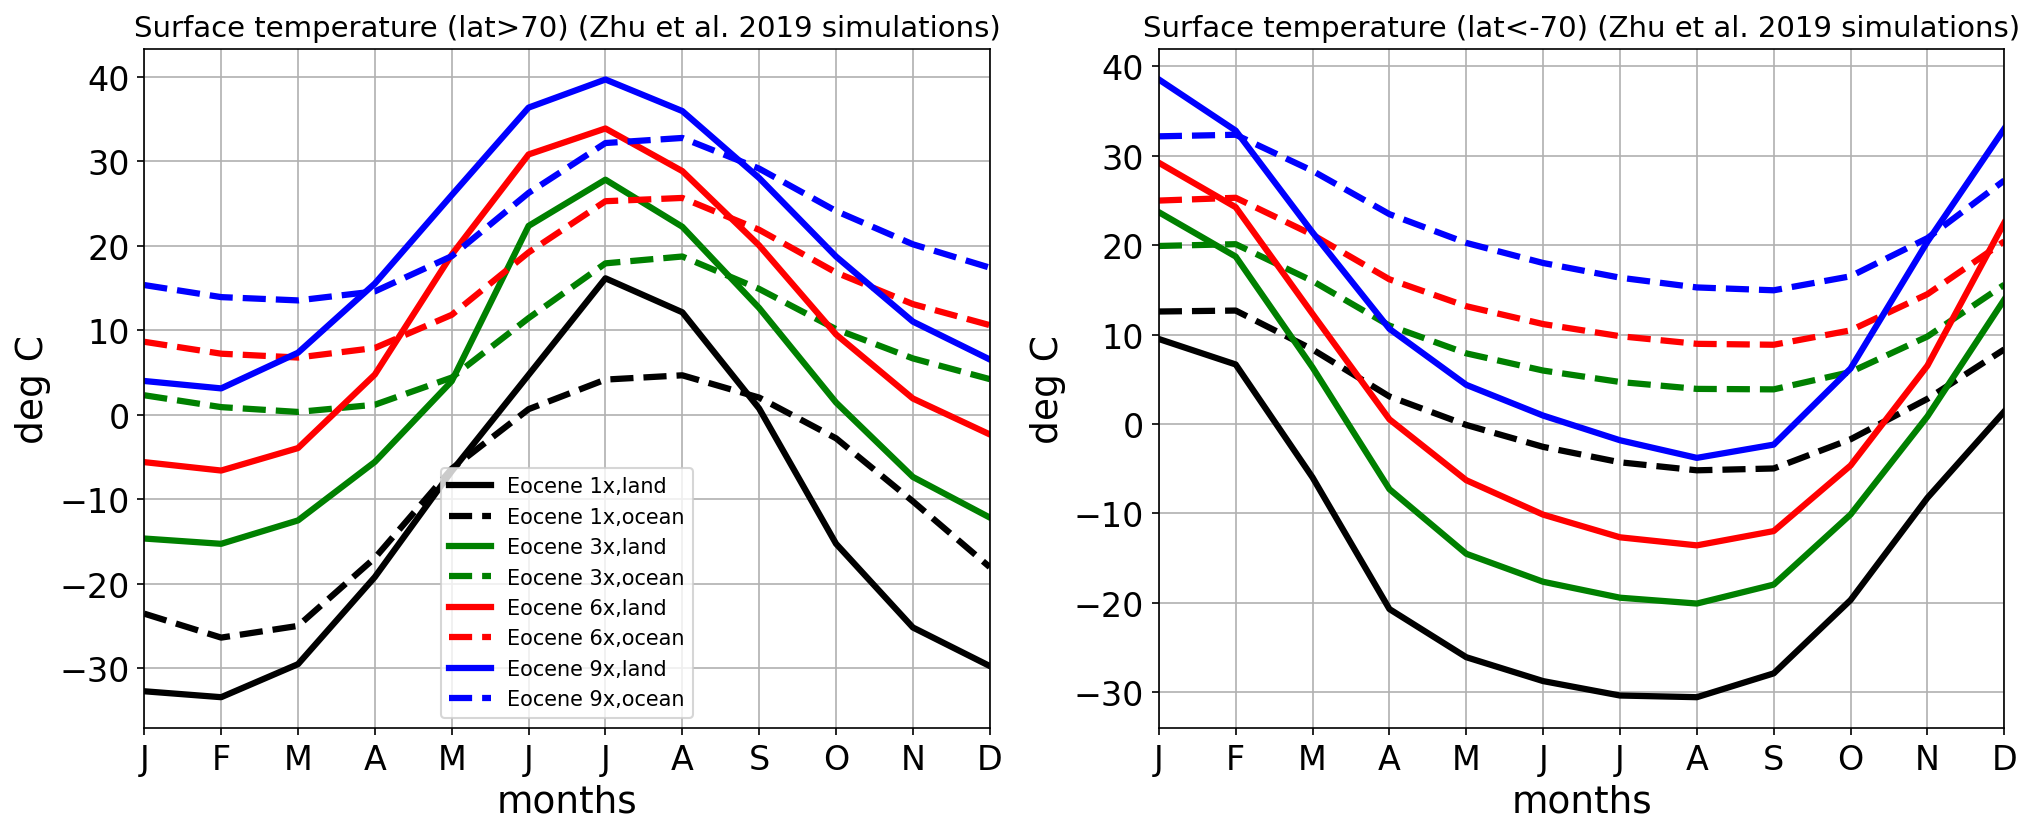

In [23]:
plt.figure(figsize=(16, 6),dpi=150)
plt.subplot(121)
plt.plot((ctl_1x.TS-273).where(ctl_1x.lat>70).where(ctl_1x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='k',label='Eocene 1x,land')
plt.plot((ctl_1x.TS-273).where(ctl_1x.lat>70).where(ctl_1x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='k',ls='--',label='Eocene 1x,ocean')
plt.plot((ctl_3x.TS-273).where(ctl_3x.lat>70).where(ctl_3x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='g',label='Eocene 3x,land')
plt.plot((ctl_3x.TS-273).where(ctl_3x.lat>70).where(ctl_3x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='g',ls='--',label='Eocene 3x,ocean')
plt.plot((ctl_6x.TS-273).where(ctl_6x.lat>70).where(ctl_6x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='r',label='Eocene 6x,land')
plt.plot((ctl_6x.TS-273).where(ctl_6x.lat>70).where(ctl_6x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='r',ls='--',label='Eocene 6x,ocean')
plt.plot((ctl_9x.TS-273).where(ctl_9x.lat>70).where(ctl_9x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='b',label='Eocene 9x,land')
plt.plot((ctl_9x.TS-273).where(ctl_9x.lat>70).where(ctl_9x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='b',ls='--',label='Eocene 9x,ocean')
plt.xlim([0,11])
# plt.ylim([5,25])
plt.xticks(np.arange(0,12,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('deg C',fontsize=18)
plt.grid()
plt.title('Surface temperature (lat>70) (Zhu et al. 2019 simulations)',fontsize=14)
plt.ylabel('deg C')
plt.xlabel('months')
plt.legend()

plt.subplot(122)
plt.plot((ctl_1x.TS-273).where(ctl_1x.lat<-70).where(ctl_1x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='k',label='Eocene 1x,land')
plt.plot((ctl_1x.TS-273).where(ctl_1x.lat<-70).where(ctl_1x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='k',ls='--',label='Eocene 1x,ocean')
plt.plot((ctl_3x.TS-273).where(ctl_3x.lat<-70).where(ctl_3x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='g',label='Eocene 3x,land')
plt.plot((ctl_3x.TS-273).where(ctl_3x.lat<-70).where(ctl_3x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='g',ls='--',label='Eocene 3x,ocean')
plt.plot((ctl_6x.TS-273).where(ctl_6x.lat<-70).where(ctl_6x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='r',label='Eocene 6x,land')
plt.plot((ctl_6x.TS-273).where(ctl_6x.lat<-70).where(ctl_6x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='r',ls='--',label='Eocene 6x,ocean')
plt.plot((ctl_9x.TS-273).where(ctl_9x.lat<-70).where(ctl_9x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='b',label='Eocene 9x,land')
plt.plot((ctl_9x.TS-273).where(ctl_9x.lat<-70).where(ctl_9x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='b',ls='--',label='Eocene 9x,ocean')
plt.xlim([0,11])
# plt.ylim([5,25])
plt.xticks(np.arange(0,12,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('deg C',fontsize=18)
plt.grid()
plt.title('Surface temperature (lat<-70) (Zhu et al. 2019 simulations)',fontsize=14)
plt.ylabel('deg C')
plt.xlabel('months')
plt.show()

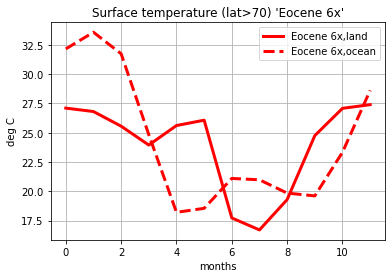

In [14]:
plt.plot((ctl_6x.TS-273).where(ctl_6x.lat>70).where(ctl_6x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values-\
         (ctl_1x.TS-273).where(ctl_1x.lat>70).where(ctl_1x.LANDFRAC>0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='r',label='Eocene 6x,land')
plt.plot((ctl_6x.TS-273).where(ctl_6x.lat>70).where(ctl_6x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values-\
         (ctl_1x.TS-273).where(ctl_1x.lat>70).where(ctl_1x.LANDFRAC<0.9).mean('lon').weighted(weights).mean('lat').values,lw=3,c='r',ls='--',label='Eocene 6x,ocean')
plt.grid()
plt.title('Surface temperature (lat>70) \'Eocene 6x\'')
plt.ylabel('deg C')
plt.xlabel('months')
plt.legend()
plt.show()

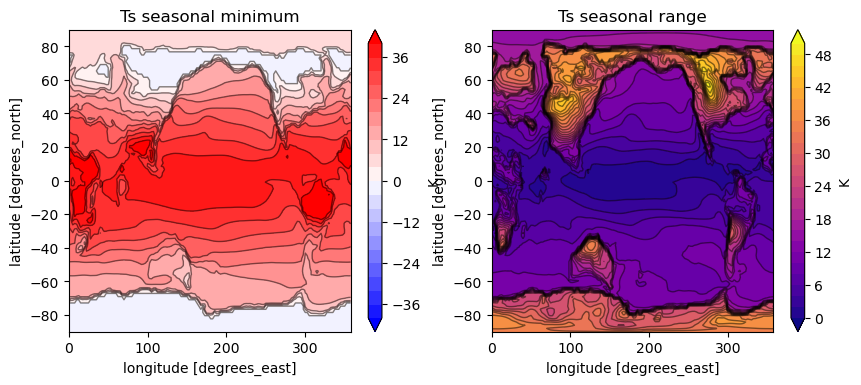

In [15]:
plt.figure(figsize=(10, 4),dpi=100)
plt.subplot(121)
(ctl_6x.TS.where(ctl_6x.TS>273,273).min('time')-273).plot.contourf(levels=np.linspace(-40,40,21),extend='both',cmap='bwr',cbar_kwargs={"label": "K"})
(ctl_6x.TS.where(ctl_6x.TS>273,273).min('time')-273).plot.contour(levels=np.linspace(-40,40,21),colors='k',linewidths=1,alpha=0.5)
plt.title('Ts seasonal minimum')
plt.subplot(122)
(ctl_6x.TS.where(ctl_6x.TS>273,273).max('time')-ctl_6x.TS.where(ctl_6x.TS>273,273).min('time')).plot.contourf(levels=np.linspace(0,50,26),extend='both',cmap='plasma',cbar_kwargs={"label": "K"})
(ctl_6x.TS.where(ctl_6x.TS>273,273).max('time')-ctl_6x.TS.where(ctl_6x.TS>273,273).min('time')).plot.contour(levels=np.linspace(0,50,26),colors='k',linewidths=1,alpha=0.5)
plt.title('Ts seasonal range')
plt.show()